In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

#使用中文字体
mpl.rcParams['font.family']=['Microsoft Yahei','sans-serif']
mpl.rcParams['axes.unicode_minus']=False

#使用svg格式，避免图形模糊
%matplotlib inline
%config InlineBackend.figure_format="svg"

In [2]:
import pandas as pd
df=pd.read_csv("mushroom.csv")
df.head()

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,True,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,True,almond,free,close,broad,black,...,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,True,anise,free,close,broad,brown,...,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,True,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,edible,convex,smooth,gray,False,none,free,crowded,broad,black,...,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses


In [17]:
x=pd.get_dummies(df[df.columns[1:]])
x

,bruises,ring-number,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,True,1,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
1,True,1,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,True,1,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,True,1,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,False,1,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,1,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
8120,False,1,False,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
8121,False,1,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
8122,False,1,False,False,False,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,False


In [18]:
y=(df["edible"]=="poisonous")
y

0        True
1       False
2       False
3        True
4       False
        ...  
8119    False
8120    False
8121    False
8122     True
8123    False
Name: edible, Length: 8124, dtype: bool

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x, y)

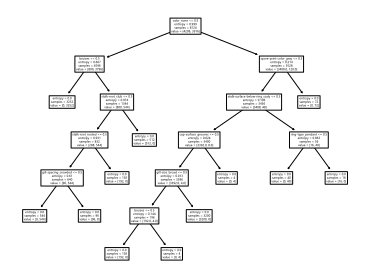

In [20]:
from sklearn.tree import plot_tree
plot_tree(clf, feature_names=x.columns)
plt.show()

In [21]:
from sklearn.tree import export_text
r = export_text(clf, feature_names=x.columns)
print(r)

|--- odor_none <= 0.50
|   |--- bruises <= 0.50
|   |   |--- class: True
|   |--- bruises >  0.50
|   |   |--- stalk-root_club <= 0.50
|   |   |   |--- stalk-root_rooted <= 0.50
|   |   |   |   |--- gill-spacing_crowded <= 0.50
|   |   |   |   |   |--- class: True
|   |   |   |   |--- gill-spacing_crowded >  0.50
|   |   |   |   |   |--- class: False
|   |   |   |--- stalk-root_rooted >  0.50
|   |   |   |   |--- class: False
|   |   |--- stalk-root_club >  0.50
|   |   |   |--- class: False
|--- odor_none >  0.50
|   |--- spore-print-color_gray <= 0.50
|   |   |--- stalk-surface-below-ring_scaly <= 0.50
|   |   |   |--- cap-surface_grooves <= 0.50
|   |   |   |   |--- gill-size_broad <= 0.50
|   |   |   |   |   |--- bruises <= 0.50
|   |   |   |   |   |   |--- class: False
|   |   |   |   |   |--- bruises >  0.50
|   |   |   |   |   |   |--- class: True
|   |   |   |   |--- gill-size_broad >  0.50
|   |   |   |   |   |--- class: False
|   |   |   |--- cap-surface_grooves >  0.50
|   |

In [22]:
from sklearn.metrics import classification_report
yfit = clf.predict(x)
print(classification_report(y, yfit))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      4208
        True       1.00      1.00      1.00      3916

    accuracy                           1.00      8124
   macro avg       1.00      1.00      1.00      8124
weighted avg       1.00      1.00      1.00      8124

